In [1]:
#importy
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from skimage import io
import skimage as si
import skimage.filters as sif
import skimage.segmentation as sis
import skimage.measure as sime
import skimage.morphology as simo
import skimage.color as sic

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import imagecodecs as ic
from matplotlib import colors

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

#FUNKCJE POMOCNICZE

def pokaz(im, tytul = "", osie = False):
    if not(osie):
        plt.axis("off") 
    if im.ndim == 2:
        plt.imshow(im,cmap='gray')
    else:
        plt.imshow(im)
    plt.title(tytul)
    
def pliob(listaobr, ile_k = 1, listatyt = [], wart_dpi = 100, osie = False):
    # wyswietla liste obrazow kolorowych lub s skali szarosci
    rozm_obr = 5
    ile = len(listaobr)
    if len(listatyt) == 0:
        listatyt = [' ']*ile
    ile_w = np.ceil(ile / ile_k).astype(int)
    figsize_k = rozm_obr*ile_k
    figsize_w = rozm_obr*ile_w
    plt.figure(figsize=(figsize_k,figsize_w), dpi = wart_dpi)
    for i in range(0,ile):
        if isinstance(listaobr[i],np.ndarray):
            plt.subplot(ile_w,ile_k,i+1)
            pokaz(listaobr[i], listatyt[i], osie)
    plt.show()
    
def segmkol(obr, prog_dol, prog_gora):
    # funkcja proguje trzy składowe koloru
    maska = (obr[:,:,0] > prog_dol[0]) & (obr[:,:,0] < prog_gora[0])
    maska = maska & (obr[:,:,1] > prog_dol[1]) & (obr[:,:,1] < prog_gora[1])
    maska = maska & (obr[:,:,2] > prog_dol[2]) & (obr[:,:,2] < prog_gora[2])
    return maska        

> Etykietowanie obiektów, w efekcie którego każdy obiekt otrzyma swoją unikalną etykietę. Wyświetlenie obrazu zawierającego etykiety. Policzenie wszystkich obiektów na obrazie i wyświetlenie wyznaczonej w ten spob liczby obiektów.

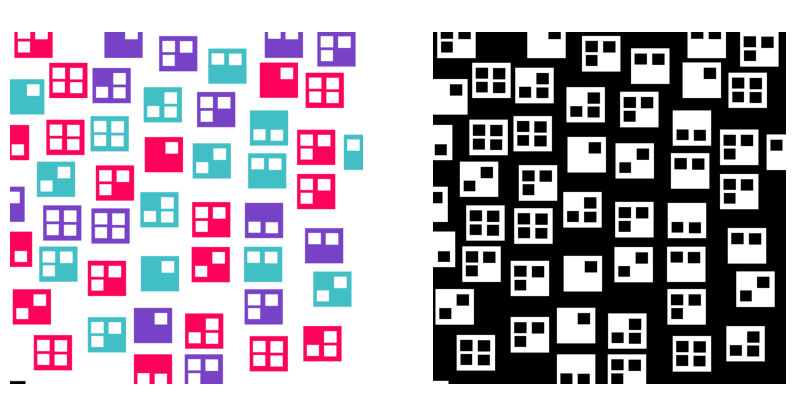

ile obiektow:  50


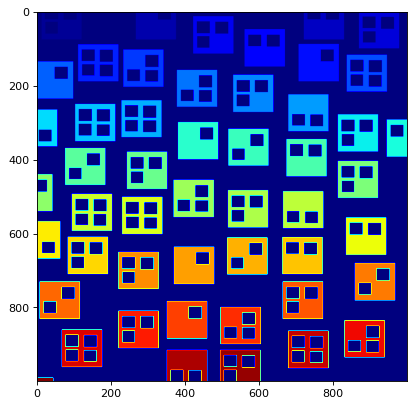

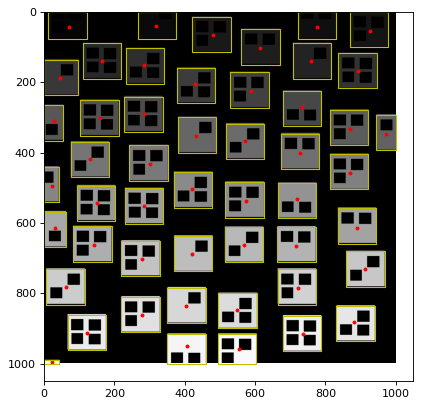

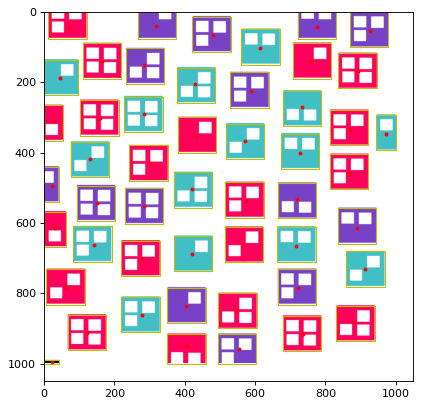

In [2]:
# miejsce na kod
o = io.imread("obraz.png")
b = o[:,:,1]<255
pliob([o,b],2)

etykiety = sime.label(b)
plt.figure(figsize=(6,6), dpi = 80)
plt.imshow(etykiety,'jet')


cechy = sime.regionprops(etykiety)
plt.figure(figsize=(6,6), dpi = 80)
plt.imshow(etykiety, cmap=plt.cm.gray)
for obiekt in cechy:
    y0, x0 = obiekt.centroid
    plt.plot(x0, y0, '.r', markersize=5)
    minr, minc, maxr, maxc = obiekt.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    plt.plot(bx, by, '-y', linewidth=1)
    
plt.figure(figsize=(6,6), dpi = 80)
plt.imshow(o, cmap=plt.cm.gray)
for obiekt in cechy:
    y0, x0 = obiekt.centroid
    plt.plot(x0, y0, '.r', markersize=5)
    minr, minc, maxr, maxc = obiekt.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    plt.plot(bx, by, '-y', linewidth=1)
    
ile_obiektow = len(cechy)
print("ile obiektow: ",ile_obiektow)

> Dobranie cech umożliwiających rozróżnienie wskazanych liczby otworow w obiektach. 

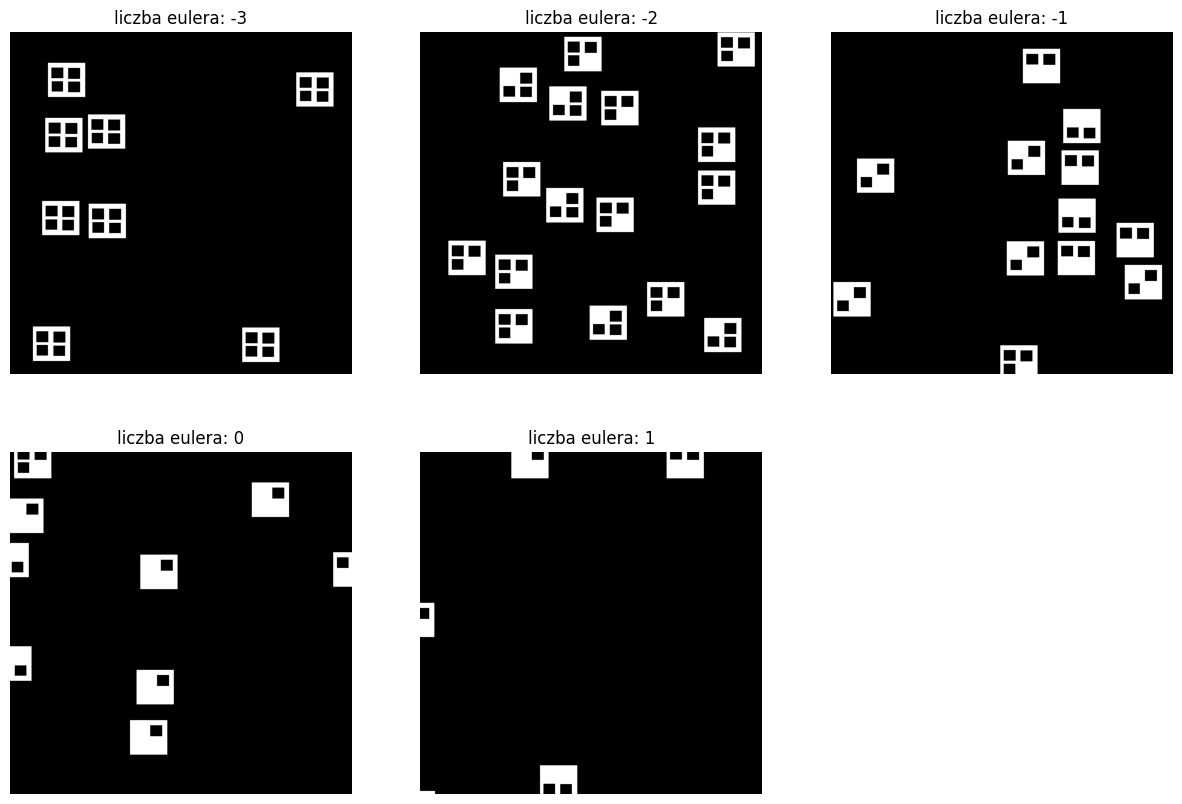

In [3]:
# miejsce na kod
#cecha to liczba otworow
#cecha rozróżniajaca to liczba eulera

ile_obiektow = len(cechy)
lista_cech = ['EulerNumber']
ile_cech = len(lista_cech)
tabela_cech = np.zeros((ile_obiektow,ile_cech+1))
tabela_cech[0,:] = np.nan #np.ones((1,ile_cech +1))*-99 # cechy nieistniejącego obiektu o etykiecie "0"
for i in range(0,ile_obiektow):
    for j in range(0,ile_cech):
      #  tabela_cech[i+1,j] = cechy[i][lista_cech[j]]
      tabela_cech[i,j] = cechy[i][lista_cech[j]]

# zero_dz = np.where(tabela_cech[:,0] == 1) + np.array(1)
# jenda_dz = np.where(tabela_cech[:,0] == 0) + np.array(1)
# dwie_dz = np.where(tabela_cech[:,0] == -1) + np.array(1)
# trzy_dz = np.where(tabela_cech[:,0] == -2) + np.array(1)
# cztery_dz = np.where(tabela_cech[:,0] == -3) + np.array(1)


lio = []
lin = []
for numer_klasy in range(-3,2):
    lio.append(np.where(np.isin(etykiety,np.where(tabela_cech[:,0] == numer_klasy)+ np.array(1)),255,0))
    lin.append('liczba eulera: ' + str(numer_klasy))
pliob(lio,  3, lin) 




> Kod zliczający obiekty w każdej kategorii

In [4]:
# miejsce na kod
for numer_klasy in range(-3,2):
    print('liczba otworow: ' + str(numer_klasy*(-1)+1) + ' liczba obiektów: '+ str(len(np.where(tabela_cech[:,0] == numer_klasy)[0])))

liczba otworow: 4 liczba obiektów: 8
liczba otworow: 3 liczba obiektów: 16
liczba otworow: 2 liczba obiektów: 12
liczba otworow: 1 liczba obiektów: 9
liczba otworow: 0 liczba obiektów: 5
